# SFML Project

Ward Gauderis - 0588485
Fabian Denoodt - TODO

Master Computer Science in Artificial Intelligence - Vrije Universiteit Brussel

## Introduction

This interactive research report is made by Fabian Denoodt and Ward Gauderis as part of the course Statistical Foundations of Machine Learning. The report is completely self-contained and the reader is encouraged to repeat our experiments and modify them.<br> 
In designing our three research questions, we have chosen topics that were mentioned in the course that we wanted to understand better or investigate in more detail. The first question is about the influence of stochastic noise and regularisation on the trained model and is mainly examined by Ward with synthetic datasets and a simple neural network for classification. The second question is mainly investigated by Fabian with a syntehtic data set and attempts to give insight into the role of different kernels in a support-vector machine. The last question is examined by both group members where Fabian focuses on the first part and Ward on the second part. It tries to shed light on two learning models for regression that were only touched upon during the lectures, k-nearest neighbour regression and decision tree regression, and how these perform for time-series forecasting with a real-world dataset.<br>
The full questions are:

1. What is the influence of stochastic noise in the dataset on the in- and out-of-sample error of a neural network and how does weight decay regularisation counter this?
2. b
3. c

## Research Question 1

As a general research goal, we pose the question

**What is the influence of stochastic noise in the dataset on the in- and out-of-sample error of a neural network and how does weight decay regularisation counter this?**

We explain every part of this research question first in more detail before setting up the experiment, after this we present the measurement results and their interpretation.

We concider a synthetic dataset consisting of samples $(x, y)$ with $x \in \mathbb{R}^2$ and $y \in {0, 1}$ and pose the classification task of of predicting y based on x. A synthetic dataset allows us to see noise as a controllable independent variable.<br>
We examine here only the influence of stochastic noise on the generalisabilty of the trained model. 
Our definition of the dataset allows for a further distinction between label noise and data noise. Label noise occurs when samples $x$ in the dataset are assigned incorrect labels $y$. In our case, symmetric label noise can be modelled in the dataset by swapping the labels of a percentage of samples. Data noise on the other hand relates to noise in the features x which are in our case continuous. This is modelled by adding a normally distributed error term $\epsilon \sim \mathcal{N}(0,\,\sigma^{2})$ to x to obtain $x' = x + \epsilon$.<br>
We make sure our model is capable of approximating the target function $f(x) = y$ very closely as to avoid confounding deterministic noise. These stochastic and deterministic noise are both responsible for the phenonemon of overfitting where the in-sample error decreases while the out-of-sample error increases. Generally speaking, this is combatted by increasing the amount of training data or decreasing the model complexity.<br>
In this experiment we are interested only in decreasing model complexity through regularisation while keeping the amount of training data constant.
We investigate only the 'mathematical' regularisation method of penalising particular properties of the learned model $h$ using an augmented error. Instead of trying to minimize $E_{in}(h)$ we now try to minimise
$$E_{aug}(h, \lambda, \Omega) = E_{in}(h) + \dfrac{\lambda}{N}\Omega(h)$$
where $\lambda$ is the regularisation parameter determining the amount of regularisation and $\Omega$ is the regulariser. $N$ is the amount of training samples as more samples require less regularisation. In our case we examine the influence of weight decay using the $L_2$-norm which transforms the equation into
$$E_{aug}(w) = E_{in}(w) + \dfrac{\lambda}{N} ||w||^2$$
for weights $w$ in the model. This type of regularisation promotes shrinking the weights during the training process.<br>
A perfect machine learning model to examine this effect on is the neural network as neural networks are a very powerful and flexible generalisation of the linear perceptron. This great approximation power comes with the downside of overfitting the data easily. Below follows a short explanation of the neural network inner workings and learning process.

### Neural Networks

Neural networks are an extension to the perceptron model which classifies any point $x \in \mathbb{R}^(d)$ as
$$h(x) =sign(w^Tx + b)$$
using learned weights $w$ and bias $b$. This model is able to learn a linear decision boundary based on any linearly separable dataset using the PLA algorithm.<br>
The multi-layer perceptron is an extension of this model where multiple perceptrons are chained behind each other in layers. Every layer can contain multiple perceptrons itself whose outputs are then served as 'features' into every perceptron in the next layer. The first layer 0 is the input layer containing the original features $x$ which is connected to 0 or more fully-connected hidden layers $l$ of which the outputs are propagated into (in our case) one final single perceptron in layer $L$. This process is called forward-propagation. <br>
In this way, the output of $L$ is the classification of $x$ done by the full model and non-linear target functions can be represented. The final prediction for $L$ layers could be represented like this
$$h(x) = \theta(A_L(\theta(A_{L-1}(\theta(\dots(A_1x)))))$$
where $A_ix = W_i x + b_i$ a linear transformation with the weight matrix $W_i$ and bias vector $b$ and $\theta(x) = sign(x)$ the activation function. Learning such a complex system of many weights is a hard combinatorial problem because the $sign(\cdot)$ activation function is not a smooth function.<br>
In a real neural network this activiation function is therefore replace by a similar sigmoid function (like $\tanh(x)$) is actually smooth and differentiable. This allows us to use analytic methods to learn the model.<br>
The most commonly used method to learn a target function using a neural network is stochastic gradient descent. In normal 'batch' gradient descent an error function
$$E_{in}(w) = \dfrac{1}{N} \sum_{n=1}^N e(h(x_n), y_n)$$
is minimised by taking iterative steps in the opposite direction of the gradient $\nabla E_{in}(w)$ at $w$ with respect to _every_ training sample
$$w \leftarrow w - \eta \nabla E_{in}(w)$$
for a certain learning rate $\eta$.
In stochastic gradient descent this happens for every indidivual training sample instead of the full training set
$$w \leftarrow w - \eta \nabla e(h(x_n), y_n)$$
In expectation both variants of gradient descent will result in the same $w$ that minimises $E_{in}(w)$ but stochastic gradient descent is computationally cheaper, randomised and simpler.<br>
When applying this to the weights inside our neural network, we need a proper definition for the error on a sample $e(h(x_n), y_n)$. In our case the network is used for binary classification by predicting the probability that $x$ is of class $y = 1$
$$h(x) = P(y = 1 | x)$$
based on which a discrete decision can then be made. The error to be minimised for this problem is the cross-entropy error (also called the logarithmic loss) which maximises the likelihood of the training data
$$\prod_{n=1}^N P(y_n | x_n)$$
Calculating the gradient of this function is not a straightforward task for a neural netwok but can be done efficiently through the so-called backpropagation algorithm which is able to calculate the partial derivative for every weight from back to front by making use of the chain rule.<br>
In this way the neural network is able to approximate non-linear target functions through the combination of linear transformations and non-linear activation functions. One could view what the network does as learning appropriate non-linear transformations on the input data $x$ that allow for a linear classification in this transformed space.

### Initialisation

Before starting our experiment we create some useful helper functions for plotting scattered data points and decision boundaries in two dimensions.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles, make_moons, make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

cmap = plt.cm.RdBu_r

def scales(ax: plt.Axes) -> None:
    """
    Helper function to configure the axes
    :param ax: plot axes
    :return: None
    """
    x_min = -2
    x_max = 2
    y_min = -2
    y_max = 2

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_aspect("equal")

    return x_min, x_max, y_min, y_max


def plot_points(X: np.ndarray, y: np.ndarray, ax: plt.Axes) -> None:
    """
    Make a scatter plot of the points and their label
    :param X: features
    :param y: labels
    :param ax: plot axes
    :return: None
    """
    scales(ax)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s=20)


def plot_decision_boundaries(X, y, ax: plt.Axes, model: Pipeline, resolution=0.02, decision=False) -> plt.Axes:
    """
    Plot the decision boundary of a sklearn model together with the data points
    :param X: features
    :param y: labels
    :param ax: plot axes
    :param model: sklearn model
    :param resolution: resolution of the contour plot
    :param decision: plot decisions or probabilities
    :return: ax
    """
    x_min, x_max, y_min, y_max = scales(ax)

    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))
    if decision:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, cmap=cmap, s=10)

    return ax

### Generating Synthetic Datasets

We create a function that allows for the generation of two types of data sets in combination with varying noise parameters. One dataset resembles the two classes as two moons close to eachother in the feature space while the other represents them as two concentric circles. The target function of the moon datasets could be considered to be a little more complex. The function allows for the addition of label noise, in which up to 50% of the labels are randomly swapped, and data noise, in which a normally distributed error in both axes is added to the features.

In [2]:
def make_datasets(moons: bool, data_noise: bool, label_noise: bool, min_noise: float, max_noise: float,
                  dataset_size: int, N: int) -> (
        list[(np.ndarray, np.ndarray)], np.ndarray):
    """
    Make N synthetic data sets ranging in noise value
    :param moons: make two moon shape classes of points or make two contained circular classes of points
    :param data_noise: Add Gaussian data noise to the features
    :param label_noise: Add label noise by swapping a percentage of labels
    :param min_noise: minimum noise value >= 0
    :param max_noise: maximum noise value >= 0
    :param dataset_size: amount of data points
    :param N: Amount of datasets to generate
    :return: A list of datasets and an array of noise values
    """
    datasets = []

    noises = np.linspace(min_noise, max_noise, N)
    for noise in noises:
        X, y = [],[]
        if moons:
            X, y = make_moons(dataset_size, random_state=0, noise=noise if data_noise else 0)
            X[:,0] -= 0.5
        else: 
            X, y = make_circles(dataset_size, random_state=0, noise=noise if data_noise else 0, factor=0.5)

        # Add label noise by swapping a fraction of labels corresponding to noise / 2
        # In this way, a noise value of 1 results in 50% of the labels being swapped
        if label_noise:
            for i in range(int(dataset_size * noise / 2)):
                y[i] = 0 if y[i] else 1

        datasets.append((X, y))
    return datasets, noises

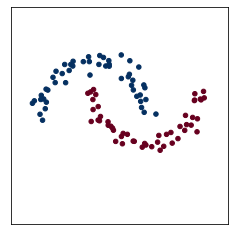

In [3]:
# Plot some moons with data noise
data, noises = make_datasets(True, True, False, 0.1, 0.1, 100, 1)
X, y = data[0]
plot_points(X, y,  plt.subplot())

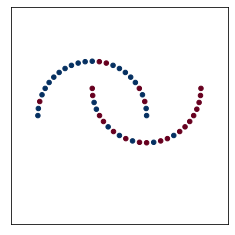

In [4]:
# Plot some circles with labeling noise
data, noises = make_datasets(True, False, True, 0.5, 0.5, 50, 1)
X, y = data[0]
plot_points(X, y,  plt.subplot())

### Generating Models

We now create a function that generates many neural network models for us with varying regularisation amounts.
Every model has been given two hidden layers of size 20 of with Relu activation functions to make sure deterministic noise is as absent as possible.
The models run for 2000 epochs and are not allowed to stop early as we don't want early early stopping regularisation to interfere.
We use the _lbfgs_ optimiser which actually belongs to the family of quasi-Newton methods and not gradient descent methods because this method performs better for small data set in terms of convergence speed.

In [5]:
def make_models(min_regularisation: float, max_regularisation: float, N: int) -> (list[Pipeline], np.ndarray):
    """
    Make N multi-layer perceptron models ranging in the amount of L2 regularization
    :param min_regularisation: minimum amount of alpha >= 0
    :param max_regularisation: maximum amount of alpha >= 0
    :param N: Amount of models to generate
    :return: A list of models and an array of alphas
    """
    models = []

    alphas = np.linspace(min_regularisation, max_regularisation, N)
    for alpha in alphas:
        models.append(
            make_pipeline(StandardScaler(), MLPClassifier(
                solver="lbfgs", # this optimiser performs best for small datasets
                hidden_layer_sizes=(20, 20), # two hidden layers of size 20
                max_iter=2000,
                early_stopping=False, # Avoid early stopping to investigate only the influence of weight decay
                random_state=0,
                alpha=alpha
            ))
        )
    return models, alphas

### Training and Plotting Decision Boundaries

This function makes it possible to train every generated model on every generated dataset and visualise a selection the learned decision boundaries. Every dataset is split in a test and training set and both the training and test scores are calculated for every combination.

In [6]:
def train_and_plot(datasets: list[(np.ndarray, np.ndarray)], noises: np.ndarray, models: list[Pipeline],
                   alphas: np.ndarray, plots: int, samples: int, plot: bool = True) -> (list[float], list[float]):
    """
    Train every model on every dataset, calculate the training and testing error and plot a selection of the learned decision boundaries
    :param datasets: list of datasets
    :param noises: list of the amount of noise in every dataset
    :param models: list of models
    :param alphas: list of the regularisation parameter in every model
    :param plots: the amount of decision boundary plots on every axis to plot
    :param samples: the ratio of model/datasets that aren't plotted but only trained for error measurements
    :param plot: True if the plot needs to be made
    :return: A list of training errors and a list of testing errors
    """
    # index of the next plot to make
    i = 1
    plt.figure(figsize=((plots + 1) * 3, plots * 3))

    train_scores = []
    test_scores = []

    for dataset_index, ((X, y), noise) in enumerate(zip(datasets, noises)):
        # Split the data into training and testing data
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.4)

        # Plot the dataset if required
        if dataset_index % samples == 0:
            ax: plt.Axes = plt.subplot(plots, plots + 1, i)
            i += 1

            plot_points(X, y, ax)

            ax.set_ylabel(f"Noise: {noise:.2f}", fontsize=15)

        for model_index, (model, alpha) in enumerate(zip(models, alphas)):
            print(f"{dataset_index + 1}/{len(datasets)} datasets, {model_index + 1}/{len(models)} models", end="\r")

            # Fit the model to the training data
            model.fit(X_train, y_train)

            # Calculate the training and testing score
            train_scores.append(model.score(X_train, y_train))
            test_scores.append(model.score(X_test, y_test))

            # Plot the decision boundary if required
            if dataset_index % samples == 0 and model_index % samples == 0:
                ax: plt.Axes = plt.subplot(plots, plots + 1, i)
                i += 1

                plot_decision_boundaries(X, y, ax, model)

                if dataset_index == 0:
                    ax.set_title(f"Regularisation: {alpha:.2f}", fontsize=15)

    plt.suptitle("Learned decision boundaries")
    if not plot:
        plt.close()

    return train_scores, test_scores

### Plotting the Accuracy Scores

Most importantly, as we want to compare the influence of regularisation and noise on the training an test scores, this function creates a contour plot for both scores as dependend variables. The amount of noise and regularisation are the indpendent variables.

In [7]:
def score_contour_plot(noises: np.ndarray, alphas: np.ndarray, train_scores: list[float], test_scores: list[float]):
    """
    PLot a contour plot of the training and testing scores for every combination of noise and regularisation
    :param noises: array of noise values
    :param alphas: array of regularisation amounts
    :param train_scores: training scores for the corresponding datasets and models
    :param test_scores: testing scores for the corresponding datasets and models
    :return:
    """
    xx, yy = np.meshgrid(alphas, noises)

    plt.figure(figsize=(3 * 4, 2 * 4))
    i = 1
    for data, title in [(train_scores, "Training Score"), (test_scores, "Test Score")]:
        ax: plt.Axes = plt.subplot(1, 2, i)
        ax.set_title(title)
        ax.set_ylabel("Noise")
        ax.set_xlabel("Regularisation")
        z = np.reshape(data, xx.shape)
        c = ax.contourf(xx, yy, z, np.linspace(z.min(), z.max(), 20), cmap=cmap)
        ax.invert_yaxis()
        i += 1

    plt.colorbar(c, ax=plt.gcf().axes, orientation="horizontal")
    plt.suptitle("Contour plot of the scores")

### Setting up the Experiments

We now set up some experiments. By default we generate 13 datasets and models, varying in noise and regularisation. For a sample of $5^2 = 25$ combinations, the learned decision boundaries will be plotted. The resolution of the resulting score contour plot can be increased by increasing the _samples_ parameter. We vary the noise level between 0 and 0.75 and the amount of regularisation between 0 and 1.5. Every dataset contains 100 samples. Feel free to adjust these parameters to experiment of adjust the running time of the experiments.

In [8]:
# Amount of decision boundary plots to make on every axis
plots = 5
# Amount of samples that need to be made in between every plot
# More samples result in a higher resolution score contour plot
samples = 3
# Calculate the total amount of datasets and models to generate
# DON't CHANGE
N = (plots - 1) * samples + 1

# The minimum and maximum amount of stochastic noise to test
min_noise = 0
max_noise = 0.75

# The amount of points in every dataset
dataset_size = 100

# The minimum and maximum amount of regularisation to test
min_regularisation = 0
max_regularisation = 1.5

# Create all the models with different alphas
models, alphas = make_models(min_regularisation, max_regularisation, N)

### Results and Interpretation

We now run our experiment on a moon dataset with only data noise.

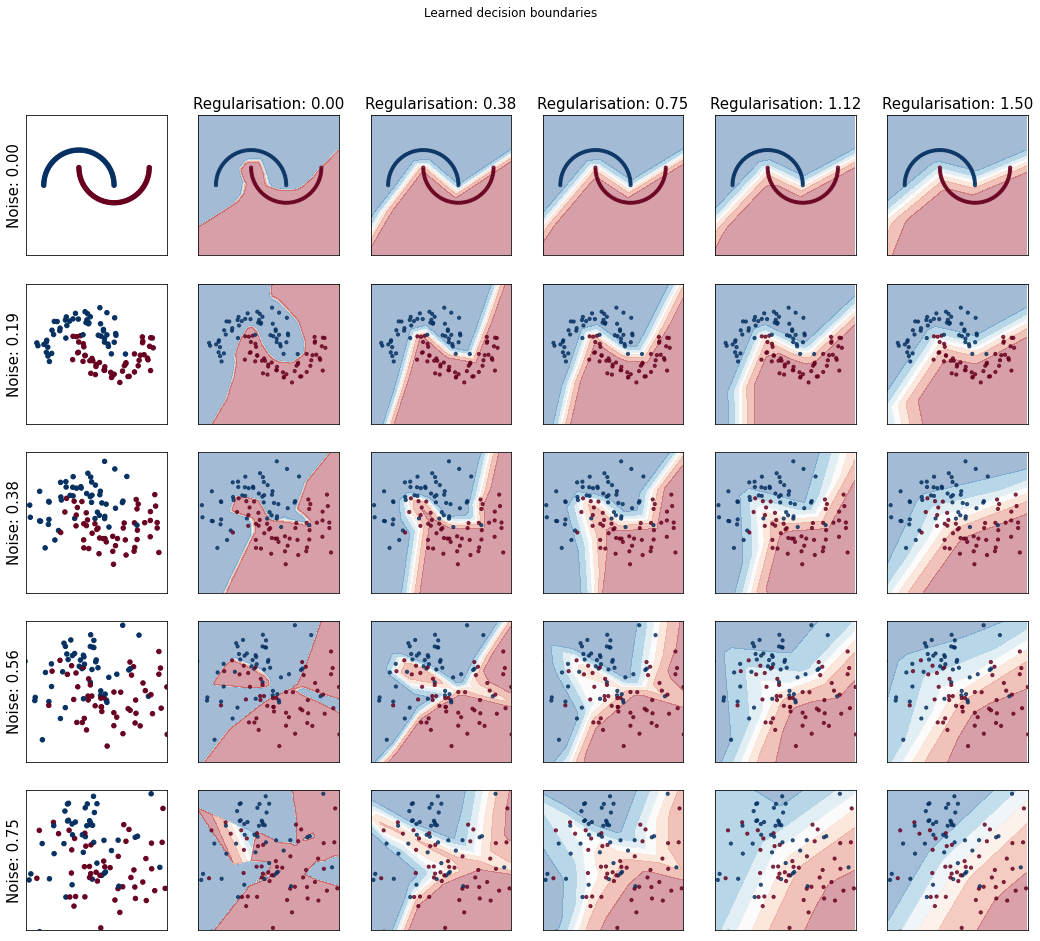

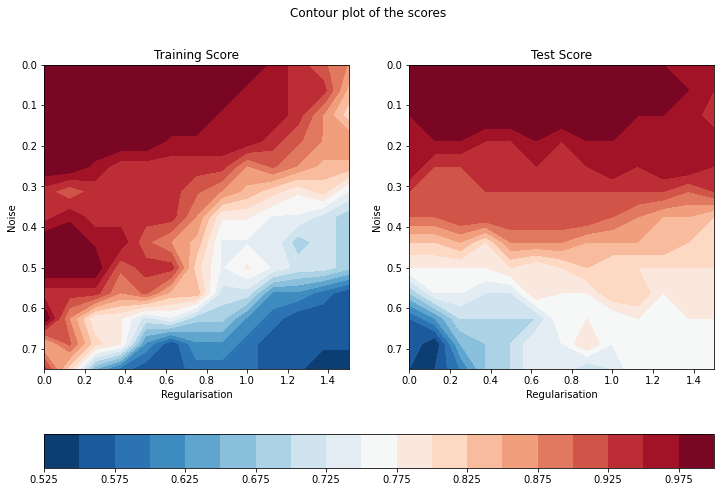

In [9]:
# Create a moon dataset with only data noise
datasets, noises = make_datasets(True, True, False, min_noise, max_noise, dataset_size, N)
# Train the models on every dataset and plot a selection of the resulting decision boundaries
train_scores, test_scores = train_and_plot(datasets, noises, models, alphas, plots, samples)
# Plot the influence of noise and regularisation on the scores in a contour plot
score_contour_plot(noises, alphas, train_scores, test_scores)

As we can observe in the top left corner of the decision boundary plot (which actually is a plot of the probability $P(y=1|x)$), without any noise or regularisation the model is perfectly able to approximate the target function. However when we examine the plots going down where the value of noise increases, the model is starting to overfit more and more until the original target function is not recognisable anymore.<br>
When we look to the plots on the right where the amount of regularization increases, we see that the decision boundary resembles the target function still but in a constrained way. Looking down now also to the plots where both noise and regularisation are present, we can observe that the target function remains recognisable longer. Altough this is no longer true when the regularisation parameter is too high.

Drawing conclusions only from looking at decision boundaries is hard. The second figure helps us by displaying the influence of data noise and regularisation on the training score, left, and testing score, right.
Unexpectedly, the training score doesn't go down when we only increase the noise level but the testing score does drop to almost 50% accuracy. This is a classic example of overfitting where the data noise is learned by a model that is too complex for the amount of available training data.<br>
However by forcing the complexity of the model down through regularisation, a high test score of about 75% can still be obtained even for lots of data noise. When doing this, the training score does go because the gradient descent algorithm is minimising a loss function that becomes more and more different from the actual error by giving more importance to small weights.<br>
On the other hand, high regularisation levels do perform less well on datasets with low amounts of data noise, both in training and test score. This could be seen as a signal of underfitting.

We now repeat the experiment for a circular dataset to ensure these results aren't completely specific to the construction of the moons.

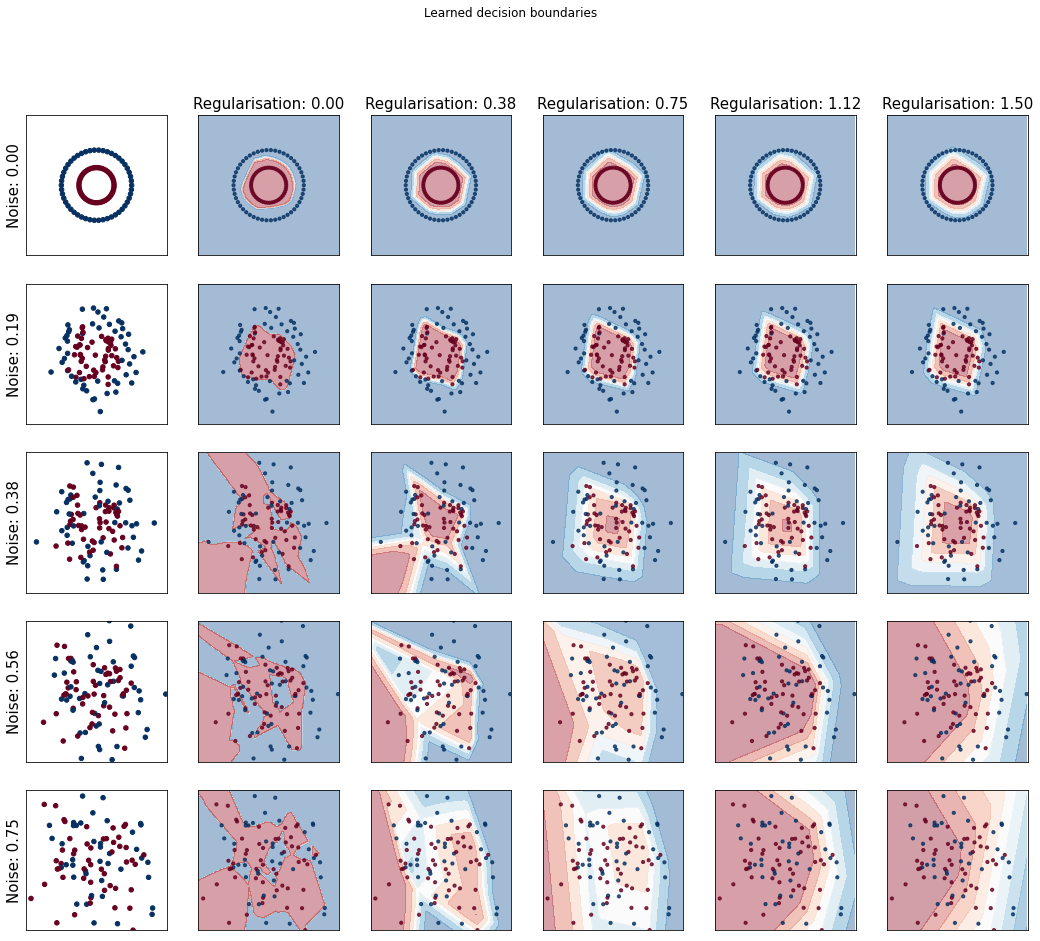

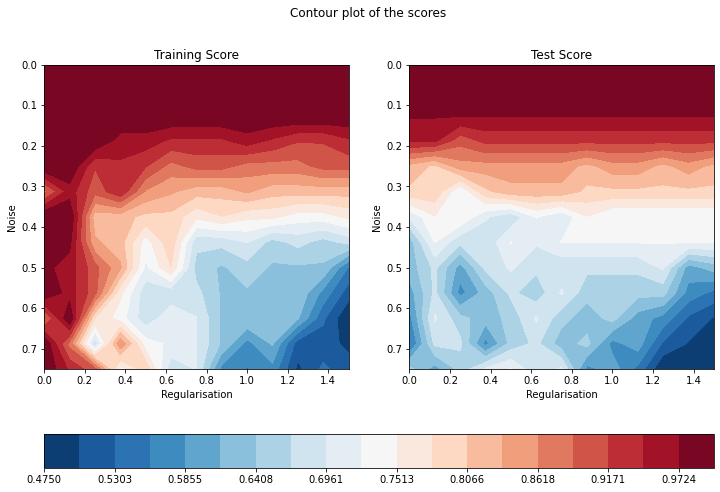

In [10]:
# Repeat the experiment for a circular dataset with only data noise
datasets, noises = make_datasets(False, True, False, min_noise, max_noise, dataset_size, N)
train_scores, test_scores = train_and_plot(datasets, noises, models, alphas, plots, samples)
score_contour_plot(noises, alphas, train_scores, test_scores)

When looking at the decision boundar plots, the importance of the right amount of regularisation becomes even clearer. When increasing the amount of data noise, both models with low regularisation and high regularisation completely fail to approximate the target circular function. However, for a regularisation amount of 0.75, the initial circle still remains recognisable.

Turning to the score contour plot, we notice that higher amounts of regularisation don't decrease the testing performance as much as for the moons dataset. Underfitting here is harder to do for a simpler target function. Training scores however do drop really fast starting from a data noise level of 0.4.<br>
For low noise levels, the countour lines of the testing score are almost horizontal, but for higher values, a regularisation amount of approximately 0.6 seems to perform the best with a testing score of about 70%. Both using less or more regularisation gets punished quickly.<br>
Noticable here is that higher regularisation amounts actually perform better for lower noise levels of about 0.4.

We repeat the two experiments now for datasets with only labeling noise. We omit the decision boundary plots now for brevity (can be shown on again by toggling the _plot_ boolean).

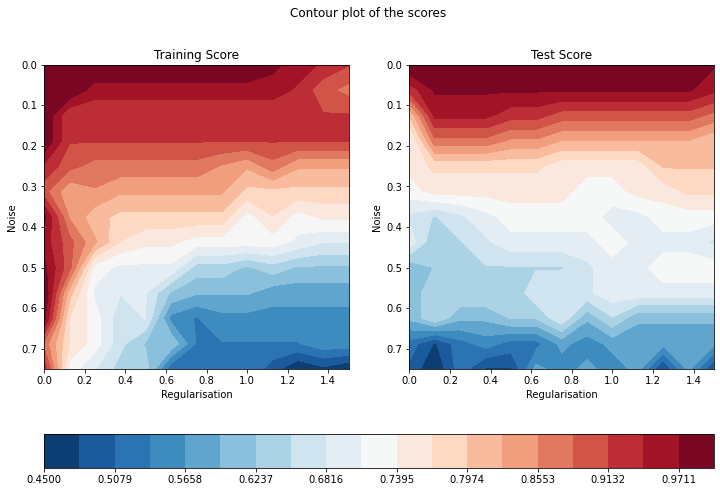

In [11]:
# Repeat the experiment for a moon dataset with only label noise
datasets, noises = make_datasets(True, False, True, min_noise, max_noise, dataset_size, N)
train_scores, test_scores = train_and_plot(datasets, noises, models, alphas, plots, samples, plot=False)
score_contour_plot(noises, alphas, train_scores, test_scores)

Clearly, labeling noise is much more detrimental to the testing accuracy of our model, altough scores between 0.6 and 0.7 are still obtainable for reasonable amounts of noise. We notice a similar trends in training scores where the scores suddenly drop very quickly when even a little amount of regularisation is used for noise levels above 0.4. In general, even slightly regularised models seem to perform better here.

We now show the influence of label noise on the circular datasets.

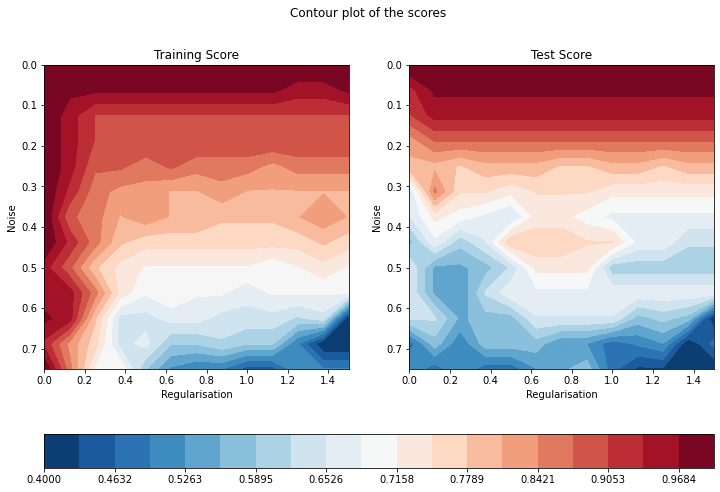

In [12]:
# Repeat the experiment for a circular dataset with only label noise
datasets, noises = make_datasets(False, False, True, min_noise, max_noise, dataset_size, N)
train_scores, test_scores = train_and_plot(datasets, noises, models, alphas, plots, samples, plot=False)
score_contour_plot(noises, alphas, train_scores, test_scores)

In comparison to the complexer moon datasets, label noise destroys the generalisability of the models less. Altough that for extreme values, the model becomes almost better at predicting the wrong label on the testing data.<br>
The training scores seem to evolve in a similar way. But when we look at the test score, we can obeserve a perfect example of both underfitting and overfitting. For relatively high noise levels about 0.4, there exists almost this peninsula where the testing score remains above 75% for regularisation values between 0.6 and 0.8. This phenonemon is not distinguisable in the training error.

We now repeat the experiment for the combination of data and label noise on both types of datasets.

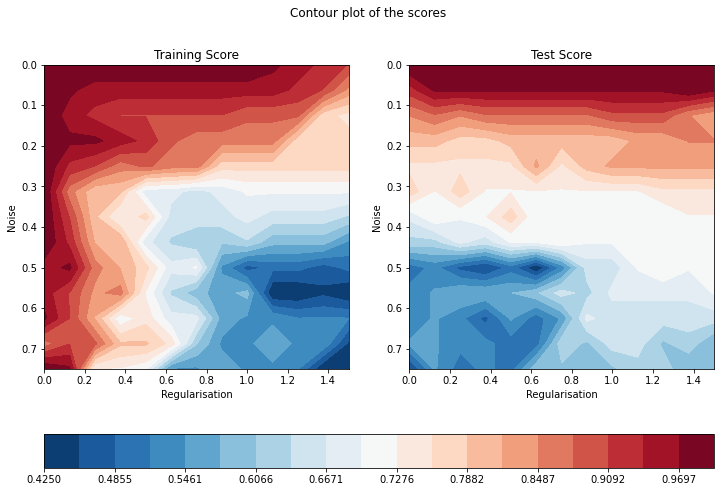

In [13]:
# Repeat the experiment for a moon dataset with both data and label noise
datasets, noises = make_datasets(True, True, True, min_noise, max_noise, dataset_size, N)
train_scores, test_scores = train_and_plot(datasets, noises, models, alphas, plots, samples, plot=False)
score_contour_plot(noises, alphas, train_scores, test_scores)

When combining the two stochastic noise types, one could expect the testing score to drop much much faster.
But for reasonable noise and regularisation values, the models are still able to generalise with about 70% accuracy.<br>
In this case, the training and testing accuracy graph are almost mirrored, indicating further that the training score becomes almost irrelevant to estimating the testing error when regularisation levels increase.

Below we show the experiment repeated for the simpler circular dataset.

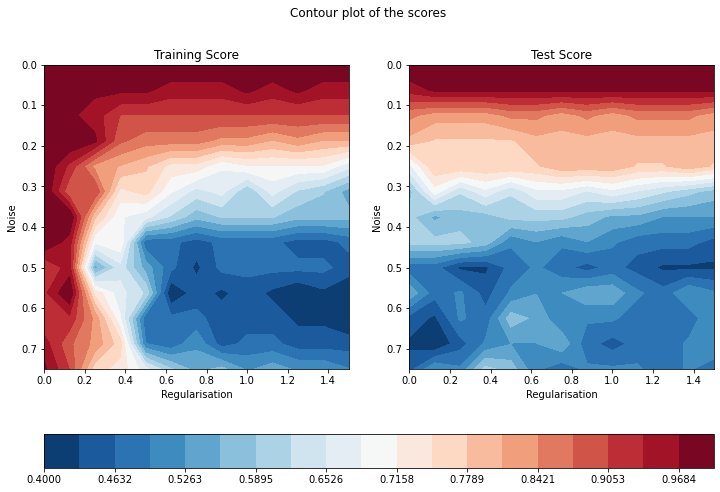

In [14]:
# Repeat the experiment for a circular dataset with both data and label noise
datasets, noises = make_datasets(False, True, True, min_noise, max_noise, dataset_size, N)
train_scores, test_scores = train_and_plot(datasets, noises, models, alphas, plots, samples, plot=False)
score_contour_plot(noises, alphas, train_scores, test_scores)

In the case of the circular dataset, combining label and data noise becomes too much for any model too handle, regardless of regularisation. The testing accuracy averages around 0.55 while the training score plot remains similar to previous experiments.<br>
In the testing plot, we observe almost horizontal contour lines resembling a sandy exotic beach with a deep blue ocean below dotted with a small archipelago around regularisation levels between 0.4 and 0.8.... Maybe it's time for a summer holiday :)

### Conclusion

From our experiments we can conclude that simpler neural networks with a lower amount of effective parameters generalise much better when trained on increasingly noisier datasets. One way such models can be obtained is by modifying the loss function that is minimised by gradient descent. Weight decay is a valid option as regulariser in the augmented error.<br>
Stochastic noise has is more detrimental to the testing error when little data is available. The model will overfit the data more than warrented, including the noise.<br>
The presence of label noise has in general a bigger effect on the generalisability of the model, but can be combatted already with lower regularisation amounts. Data noise on the other hand, decreases the test score more gradually and higher regularisation amounts may be required. In practice, label noise may be less frequent than data noise however.<br>
One must be careful not to underfit the data by reducing the complexity of the model too much. Altough in our experiments, this seemed to be less disastrous than overfitting the data without regularisation.<br>
We also observed that models trained on datasets of simpler target functions may be more susceptible to noise but require less regularisation to be corrected.<br>
The right amount of regularisation may have a very postitive effect on the generalisability of your model.
But in reality, this perfect regularisation value is hard to know as estimating the amount of noise and complexity of the dataset at hand 
is hard to do without data snooping and contamination. One should choose the model complexity based on the amount of data available, not based on the target complexity.<br>
Our experiments also show that the in-sample error becomes less and less informative about the true out-of-sample error as the amount of weight decay increases. This can be explained by the fact the loss function which is optimised by the gradient descent algorithm is no longer the same.<br>
These results only indicates further how important it is to do correct model validation in order to estimate the optimal regularisation parameter for your model trained on noisy data.

## Research Question 2


## Research Question 3

## Conclusion